# PNEUMONIA
### Definition
An infection in one or both lungs, caused by bacteria, virus or fungi. It involves inflammation of alveoli and causes difficulty in breathing. With Pneumonia, air sacs will fluid or pus. The disease can be life threatening, particularly to infants and people above 65 years of age.

### Symptoms
Symptoms can be,
1. Cough
2. Fever, sweating and chills
3. Shallow breathing
4. Chest pain

### Cause
Causes for Pneumonia are,
1. Bacteria - **Streptococcus pneumoniae**
2. Influenza
3. SARS-CoV2 (virus that cause Covid-19)

### Risk Factors
1. Conditions that weaken the immune system. Eg. AIDS
2. **Chronic Obstructive Pulmonary Disease** (COPD)
3. Diabetes
4. Old Age
5. Lack of proper Nutrition

### How to determine via Chest X-rays
When interpreting the x-ray, the radiologist will look for white spots in the lungs (called infiltrates) that identify pneumonia.

# DATASET

#### Structure
The dataset is organized into three folders - train, val and test, each having two subfolders (for corresponding class) **NORMAL** and **PNEUMONIA**.
#### Source
The chest X-ray images were taken from pedriatic patients from Guangzhou Women and Children’s Medical Center, China. All chest radiographs were initially scanned for quality control by removing the low quality or unreadable scans.

#### Link for the dataset - [Kaggle - Chest X-ray Images](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)

In [1]:
import numpy as np
import pandas
import seaborn
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras

In [3]:
info = {0 : 'Normal', 1 : 'Pnuemonia'}

# CNN Model

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D

from keras import Input
from keras.layers import Flatten

In [5]:
def conv_layer (filterx) :
    
    model = Sequential()
    
    model.add(Conv2D(filterx, (3,3), activation = 'relu', padding = 'same', kernel_regularizer = 'l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D((2,2), padding = 'valid'))
    
    return model

In [6]:
def dens_layer (hiddenx) :
    
    model = Sequential()
    
    model.add(Dense(hiddenx, activation = 'relu', kernel_regularizer = 'l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model

In [7]:
def cnn (filter1, filter2, filter3, hidden1) :
    
    # create the cnn  model
    model = Sequential()
    model.add(Input(shape = (128, 128, 1,)))
    
    # add convolution layer
    model.add(conv_layer(filter1))
    model.add(conv_layer(filter2))
    model.add(conv_layer(filter3))
    
    # flatten and hidden layer
    model.add(Flatten())
    model.add(dens_layer(hidden1))
    
    # output layer
    model.add(Dense(1, activation = 'sigmoid'))
    
    # compile the model
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

# Layers
#### Convolution layer
Kernels or filters are applied on this layer, which are convolved with portions of images to capture specific features (some capture edges, others capture contrast, etc). This also assists in reducing image size. Filters can be considered as weights for images (which they are sort of).

#### BarchNormalization
It happens that the cost function curve may thin out at some axis. So this normalizes the Inputs for faster training. This causes the cost curve to look something like the figure below.

![Image of cost function after normalization](https://i0.wp.com/www.adeveloperdiary.com/wp-content/uploads/2018/11/How-to-visualize-Gradient-Descent-using-Contour-plot-in-Python-adeveloperdiary.com-3.jpg?resize=640%2C480)

#### DropOut Layer
Asists in regularizing the weights by randomly deleting some units, so that the other nodes don't get to accustomed to the inputs and able to take variations into account.

#### Max Pooling Layer
Move a window along the image to capture the dominant features in the image. Here the window size is (2,2).

In [8]:
train_path = '../input/chest-xray-pneumonia/chest_xray/train/'
test_path  = '../input/chest-xray-pneumonia/chest_xray/test/'
eval_path  = '../input/chest-xray-pneumonia/chest_xray/val/'

# Dataset

In [9]:
import os
from sklearn.utils import shuffle
def give_set (path) :
    
    X = []
    y = []
    for label in os.listdir(path) :
        for img in os.listdir(path+label + '/') :

            img_path = path + label + '/' + img
            image = keras.preprocessing.image.load_img(img_path, color_mode = 'grayscale', target_size = (128,128))
    
            X.append(keras.preprocessing.image.img_to_array(image))
            y.append(1 if label == 'PNEUMONIA' else 0)

    X = np.array(X, dtype = float)
    y = np.array(y)
    
    return shuffle(X,y)

In [10]:
X_train, y_train = give_set(train_path)
X_eval, y_eval = give_set(eval_path)
X_test, y_test = give_set(test_path)

In [11]:
X_train /= 255.0
X_eval  /= 255.0
X_test  /= 255.0

# Class Distribution

In [12]:
print(X_train.shape)
print(y_train.shape)

(5216, 128, 128, 1)
(5216,)


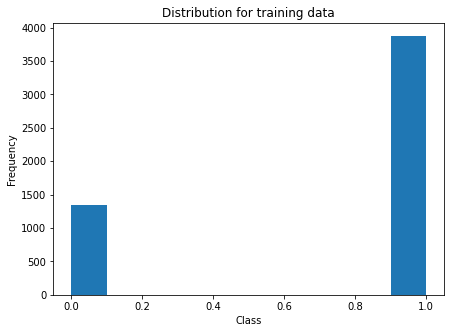

In [13]:
fig = plt.figure(figsize = (7,5))

plt.hist(y_train)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution for training data')
plt.show()

In [14]:
print(X_eval.shape)
print(y_eval.shape)

(16, 128, 128, 1)
(16,)


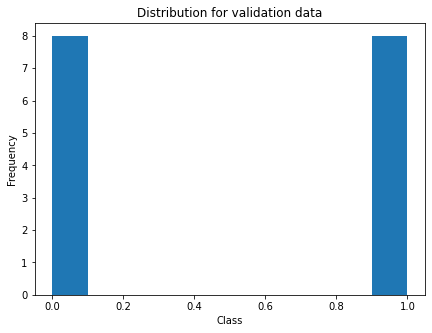

In [15]:
fig = plt.figure(figsize = (7,5))
plt.hist(y_eval)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution for validation data')
plt.show()

In [16]:
print(X_test.shape)
print(y_test.shape)

(624, 128, 128, 1)
(624,)


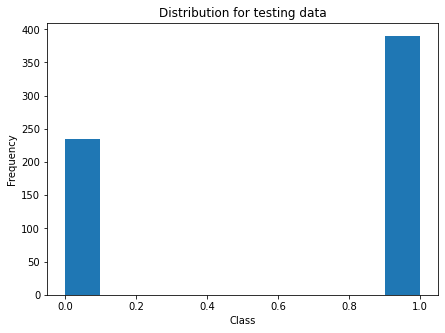

In [17]:
fig = plt.figure(figsize = (7,5))
plt.hist(y_test)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution for testing data')
plt.show()

In [18]:
print(y_train[:30])

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1]


# Original training samples

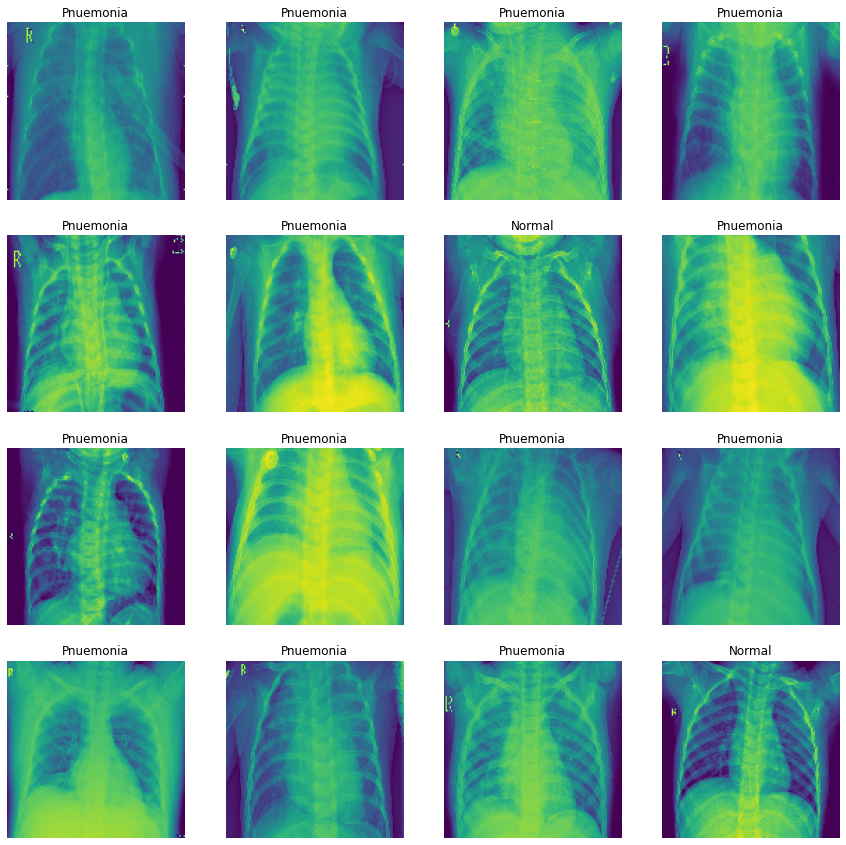

In [19]:
plt.figure(figsize = (15,15))
for i in range(16) :
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i])
    plt.title(info[y_train[i]])
    plt.axis('off')
plt.show()

# Data skewness
### Will be handled by SMOTE (imblearn)

> Prior proportion of minority class

In [20]:
print(y_train[y_train == 0].shape[0]/y_train.shape[0])

0.2570935582822086


In [21]:
from imblearn.over_sampling import SMOTE

X_train = X_train.reshape(5216, 128*128*1)
print(X_train.shape)
print(y_train.shape)

(5216, 16384)
(5216,)


In [22]:
X_train, y_train = SMOTE(sampling_strategy = 'auto', k_neighbors = 5, random_state = 1).fit_resample(X_train, y_train)

In [23]:
print(X_train.shape)
print(y_train.shape)

(7750, 16384)
(7750,)


In [24]:
X_train = X_train.reshape(7750, 128, 128, 1)

In [25]:
print(X_train.shape)
print(y_train.shape)

(7750, 128, 128, 1)
(7750,)


> After oversampling

In [26]:
print(y_train[y_train == 0].shape[0]/y_train.shape[0])

0.5


# New generated samples

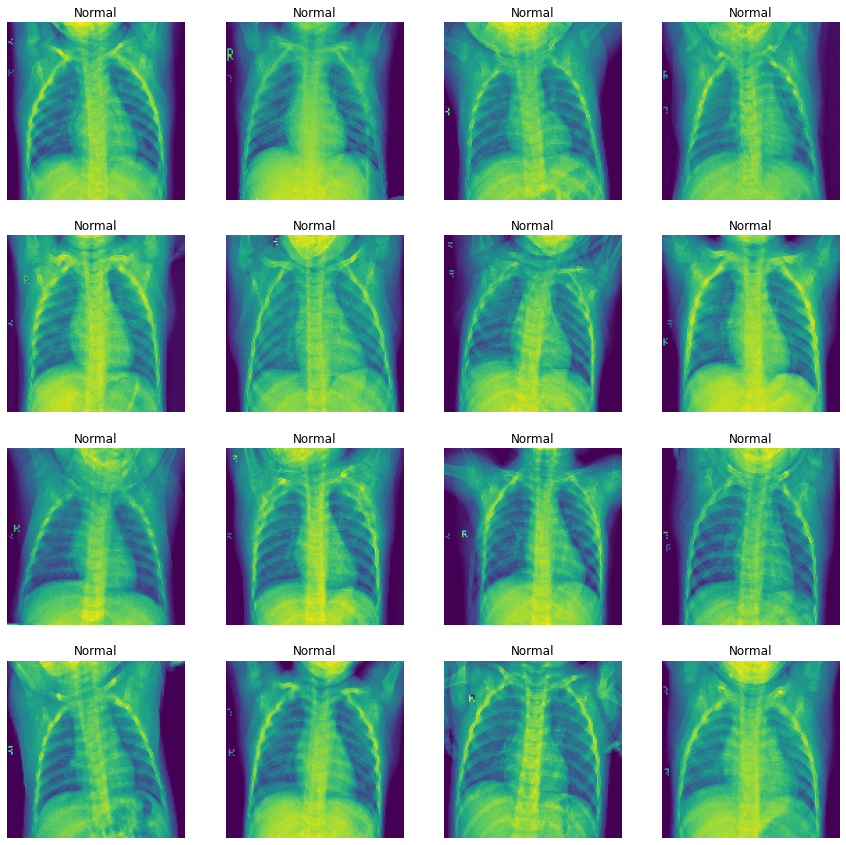

In [27]:
plt.figure(figsize = (15,15))
for i in range(16) :
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[-(i+100)])
    plt.title(info[y_train[-(i+100)]])
    plt.axis('off')
plt.show()

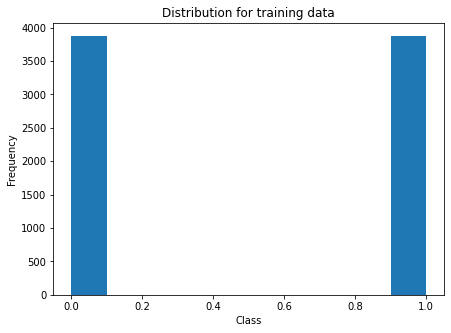

In [28]:
fig = plt.figure(figsize = (7,5))

plt.hist(y_train)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution for training data')
plt.show()

> To tackle the issue of scarcity of data, Augmentation is done, using **ImageDataGenerator** method. The new images generated will be, \
    1. Width shifts. \
    2. Zoomed in by 80%. \
    3. Rotation range.

In [29]:
from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(zoom_range = [0.85,1.0], width_shift_range = 0.02, rotation_range = 5)

In [30]:
train_gen.fit(X_train)
itr = train_gen.flow(X_train, y_train, batch_size = 32)

In [31]:
trainX, trainy = itr.next()

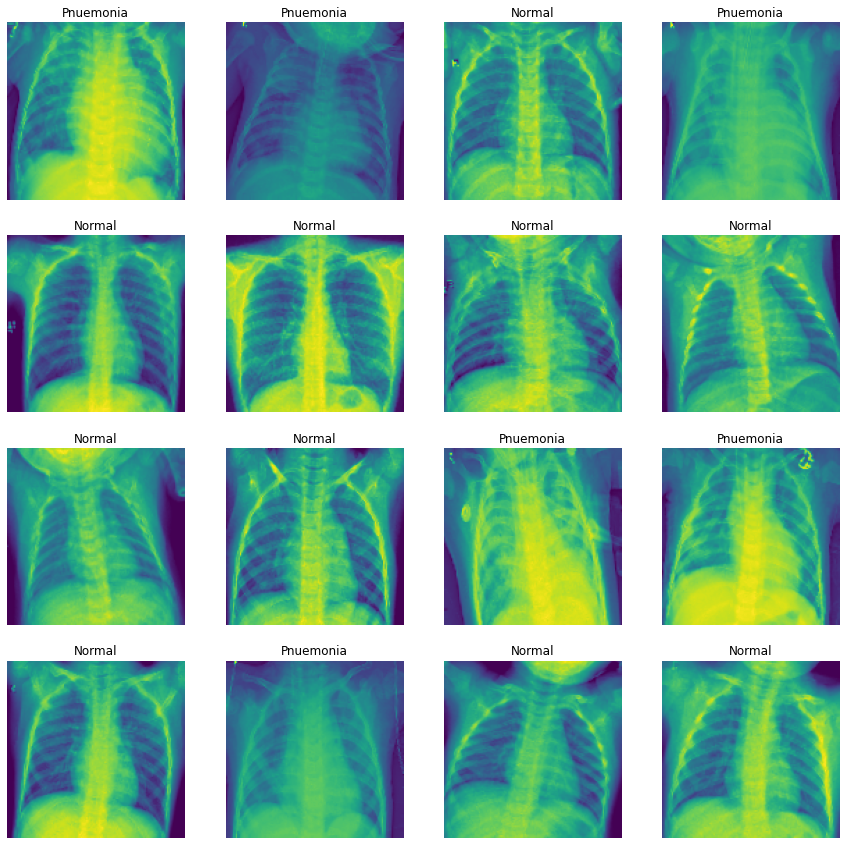

In [32]:
plt.figure(figsize=(15,15))
for i in range(16) :
    plt.subplot(4,4,i+1)
    plt.imshow(trainX[i])
    plt.title(info[trainy[i]])
    plt.axis('off')
plt.show()

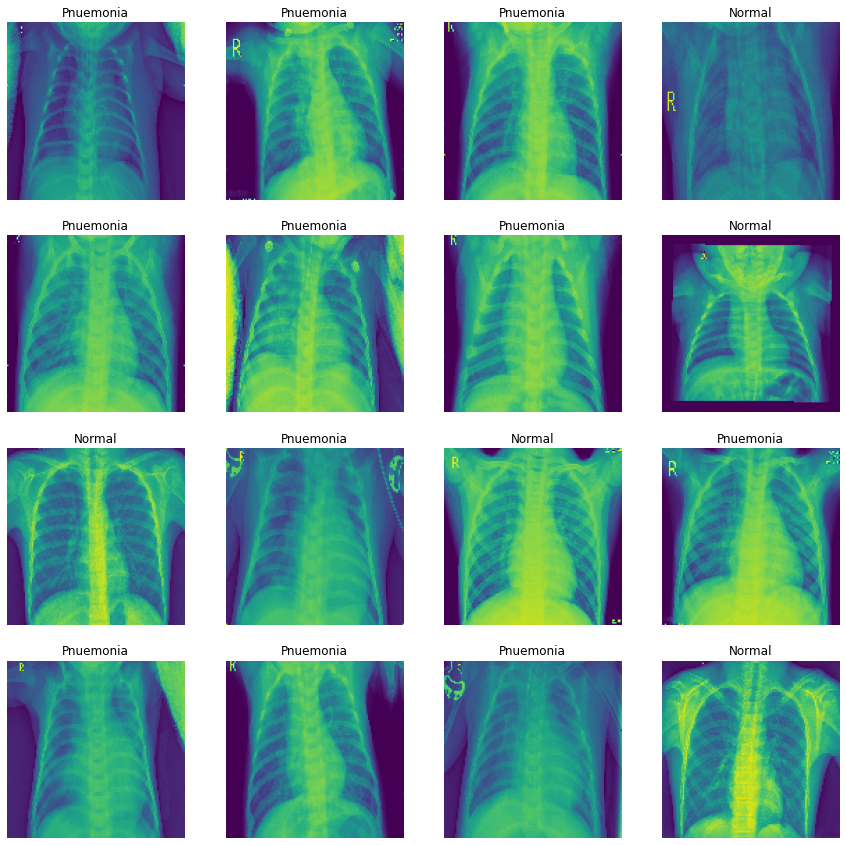

In [33]:
plt.figure(figsize=(15,15))
for i in range(16) :
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[i])
    plt.title(info[y_test[i]])
    plt.axis('off')
plt.show()

In [34]:
model = keras.wrappers.scikit_learn.KerasClassifier(build_fn = cnn, verbose = 1)

In [35]:
from sklearn.model_selection import RandomizedSearchCV, KFold

In [ ]:
param = {
    'filter1' : [128, 200],
    'filter2' : [32, 64],
    'filter3' : [16, 32],
    'hidden1' : [32, 64],
}
grd = RandomizedSearchCV(estimator = model, param_distributions = param, cv = KFold(n_splits = 2, shuffle = True, random_state = 1), verbose = 1)

In [ ]:
search = grd.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose = 0)

In [ ]:
print(search.best_params_)

In [36]:
model = cnn(128, 32, 32, 64)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 64, 64, 128)       1792      
_________________________________________________________________
sequential_2 (Sequential)    (None, 32, 32, 32)        37024     
_________________________________________________________________
sequential_3 (Sequential)    (None, 16, 16, 32)        9376      
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 64)                524608    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 572,865
Trainable params: 572,353
Non-trainable params: 512
________________________________________________

In [37]:
from keras.callbacks import ReduceLROnPlateau
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience  = 10)

In [38]:
history = model.fit(train_gen.flow(X_train, y_train, batch_size = 32), epochs = 125, validation_data = (X_eval, y_eval), callbacks = [reduce], steps_per_epoch = len(X_train)/32)

Epoch 1/125
242/242 [==============================] - 18s 57ms/step - loss: 1.4776 - accuracy: 0.9152 - val_loss: 1.5148 - val_accuracy: 0.5000
Epoch 2/125
242/242 [==============================] - 12s 50ms/step - loss: 0.4363 - accuracy: 0.9452 - val_loss: 0.9111 - val_accuracy: 0.5625
Epoch 3/125
242/242 [==============================] - 13s 53ms/step - loss: 0.3484 - accuracy: 0.9398 - val_loss: 2.9047 - val_accuracy: 0.5000
Epoch 4/125
242/242 [==============================] - 13s 53ms/step - loss: 0.3260 - accuracy: 0.9468 - val_loss: 0.8338 - val_accuracy: 0.6875
Epoch 5/125
242/242 [==============================] - 13s 52ms/step - loss: 0.3265 - accuracy: 0.9496 - val_loss: 3.4823 - val_accuracy: 0.5625
Epoch 6/125
242/242 [==============================] - 13s 55ms/step - loss: 0.3235 - accuracy: 0.9458 - val_loss: 2.0618 - val_accuracy: 0.5000
Epoch 7/125
242/242 [==============================] - 12s 51ms/step - loss: 0.2407 - accuracy: 0.9608 - val_loss: 1.2422 - val_ac

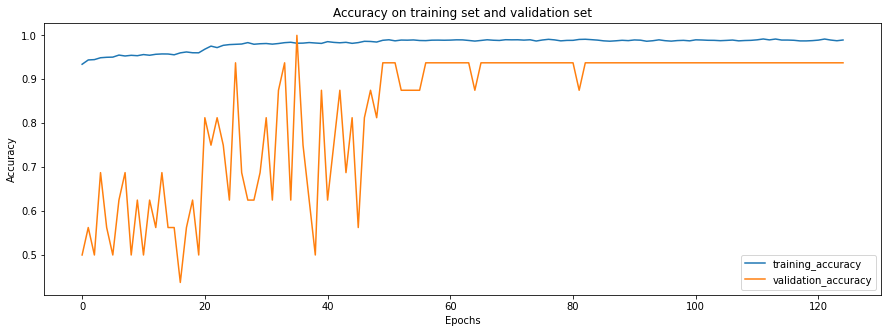

In [39]:
fig = plt.figure(figsize = (15,5))
plt.plot(history.history['accuracy'])                   # accuracy for the training set
plt.plot(history.history['val_accuracy'])               # sccuracy for the validate set
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.title('Accuracy on training set and validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

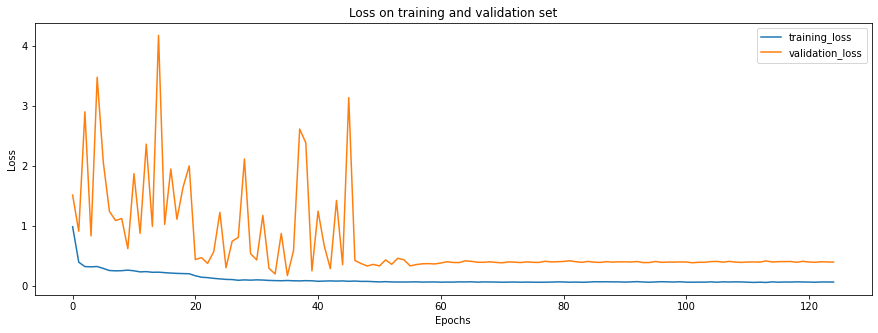

In [40]:
fig = plt.figure(figsize = (15,5))
plt.plot(history.history['loss'])                       # loss for the training set
plt.plot(history.history['val_loss'])                   # loss for the validate set
plt.legend(['training_loss', 'validation_loss'])
plt.title('Loss on training and validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [41]:
model.save('./pnue_model.h5')

In [42]:
y_pred = model.predict(X_test)

In [43]:
print(y_pred.shape)

(624, 1)


In [44]:
y_pred = np.array(y_pred.reshape(-1))

In [45]:
print(y_pred.shape)

(624,)


In [46]:
y_pred = np.around(y_pred)

In [47]:
y_pred = np.array(y_pred, dtype = int)

In [48]:
print(y_pred[:10])
print(y_test[:10])

[1 1 1 1 1 1 1 1 0 1]
[1 1 1 0 1 1 1 0 0 1]


> Overall Perfromance of the model on the test set

In [50]:
from sklearn.metrics import accuracy_score, classification_report

In [51]:
print('Accuarcy : ' + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuarcy : 0.8878205128205128
              precision    recall  f1-score   support

           0       0.97      0.73      0.83       234
           1       0.86      0.98      0.92       390

    accuracy                           0.89       624
   macro avg       0.91      0.86      0.87       624
weighted avg       0.90      0.89      0.88       624



> Draw a **confusion matrix** to evaluate the perfromance of the model

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

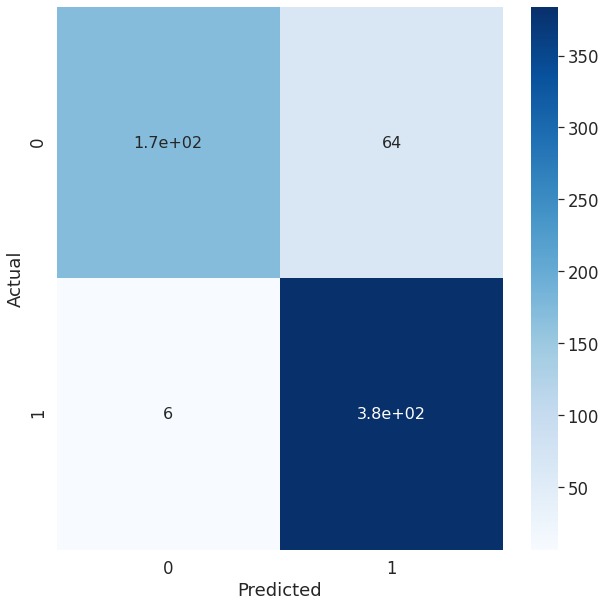

In [52]:
from sklearn.metrics import confusion_matrix
data = confusion_matrix(y_test, y_pred)
df_cm = pandas.DataFrame(data, columns = np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
seaborn.set(font_scale = 1.5)
seaborn.heatmap(df_cm, cmap = 'Blues', annot = True, annot_kws = {'size' : 16})